In [17]:
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv("/home/gurkan/Desktop/IBD Project/data/fixed_final_data.csv")
df=data.copy()

In [2]:
from docx import Document
from docx.shared import Inches
doc = Document()
doc.add_heading('Classification Results', level=1)
save_directory="/home/gurkan/Desktop/IBD Project/results/"

In [3]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
X=df.drop("diagnosis_enc",axis=1)
y=df["diagnosis_enc"]
smote=SMOTE()
X_resampled,y_resampled=smote.fit_resample(X,y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.33)

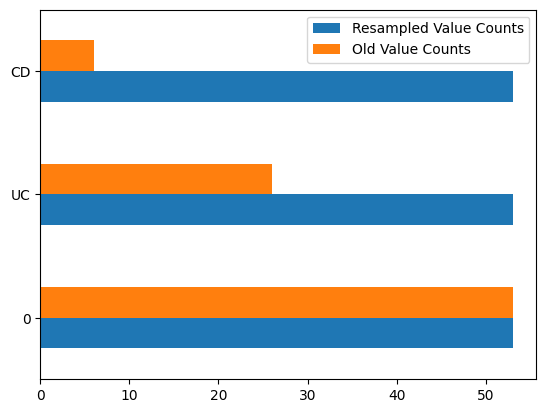

In [4]:
doc.add_heading('Handling Imbalanced Data', level=3)
paragraph = doc.add_paragraph(" ")
run = paragraph.runs[0]
run.text = "Synthetic rows were generated by the help of SMOTE method."

old_y = pd.DataFrame({'Old Value Counts': y.value_counts().values})
resampled_y = pd.DataFrame({'Resampled Value Counts': y_resampled.value_counts().values})
old_y.index = [0, 'UC', 'CD']
resampled_y.index = [0, 'UC', 'CD']
new_df=pd.concat([resampled_y,old_y],axis=1)
new_df.plot(kind="barh")

dist_of_target ='dist_of_target.png'
plt.savefig(save_directory+dist_of_target)
doc.add_picture(save_directory+dist_of_target, width=Inches(4))
run = paragraph.runs[0]
run.text = "Figure 1. Change of target variables."

Optimum n_neighbors value for f1-score: 2, it will be 'n_neighbors' parameter in KNN
Optimum n_neighbors value for accuracy: 1


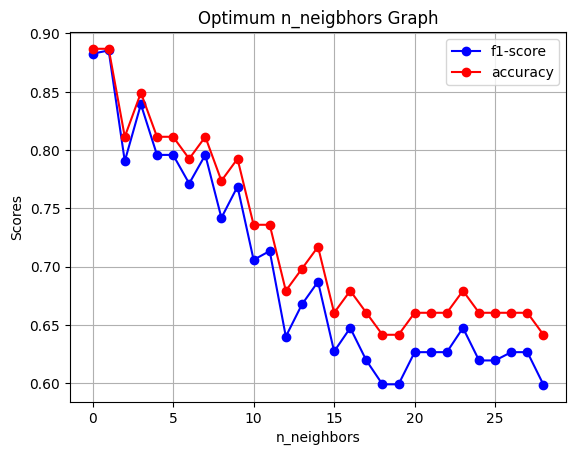

f-1 Score Cross Validated: 0.884
Accuracy Score Cross Validated: 0.887
f-1 Score: 0.885
f-1 Accuracy Score : 0.887


In [5]:
def KNN_Model(X,y):
    from sklearn.model_selection import train_test_split
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.metrics import f1_score,accuracy_score
    from sklearn.model_selection import cross_val_score
    from imblearn.over_sampling import SMOTE
    import numpy as np 
    import seaborn as sns

    smote=SMOTE()
    X_resampled,y_resampled=smote.fit_resample(X,y)
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.33)
    f1_list=[]
    acc_list=[]
    for i in range(1,30):
        model_knn=KNeighborsClassifier(n_neighbors=i)
        predictions=model_knn.fit(X_train,y_train).predict(X_test)
        f1_list.append(f1_score(y_test,predictions,average="weighted"))
        acc_list.append(accuracy_score(y_test,predictions))

    print(f"Optimum n_neighbors value for f1-score: {f1_list.index(max(f1_list))+1}, it will be 'n_neighbors' parameter in KNN")
    print(f"Optimum n_neighbors value for accuracy: {acc_list.index(max(acc_list))+1}")
    plt.plot(f1_list, marker='o', color='blue', label='f1-score')
    plt.plot(acc_list, marker='o', color='red', label='accuracy')
    plt.xlabel('n_neighbors')
    plt.ylabel('Scores')
    plt.title('Optimum n_neigbhors Graph')
    plt.legend()
    plt.grid(True)
    plt.show()

    model_knn=KNeighborsClassifier(n_neighbors=(f1_list.index(max(f1_list))+1))
    predictions=model_knn.fit(X_train,y_train).predict(X_test)
    scores_f1 = cross_val_score(model_knn, X_resampled, y_resampled, cv=10, scoring='f1_macro')
    scores_acc = cross_val_score(model_knn, X_resampled, y_resampled, cv=10, scoring='accuracy')
    f1_cv=scores_f1.mean().round(3)
    acc_cv=scores_acc.mean().round(3)
    f1_score_=f1_score(y_test,predictions,average="weighted").round(3)
    acc_score=accuracy_score(y_test,predictions).round(3)
    print(f"f-1 Score Cross Validated: {f1_cv}")
    print(f"Accuracy Score Cross Validated: {acc_cv}")
    print(f"f-1 Score: {f1_score_}")
    print(f"f-1 Accuracy Score : {acc_score}")
KNN_Model(X,y)

In [6]:
def LogReg_Model(X,y):
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import f1_score,accuracy_score
    from sklearn.model_selection import cross_val_score
    from imblearn.over_sampling import SMOTE
    from sklearn.model_selection import GridSearchCV
    import numpy as np 
    import seaborn as sns
    smote=SMOTE()
    X_resampled,y_resampled=smote.fit_resample(X,y)
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.33)
    model_log_reg=LogisticRegression()
    parameters={
    "C": [0.001, 0.01, 0.1, 1, 10, 100], 
    "penalty": ["l1", "l2","elasticnet",None],              
    "solver": ["lbfgs", "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"] 
    }
    grid_search = GridSearchCV(estimator=model_log_reg, param_grid=parameters, cv=5, scoring='f1_weighted', verbose=0)
    grid_search.fit(X_train, y_train)
    model_log_reg_gsearched=LogisticRegression(C=grid_search.best_params_["C"],
                                               penalty=grid_search.best_params_["penalty"],
                                               solver=grid_search.best_params_["solver"])
    predictions=model_log_reg_gsearched.fit(X_train,y_train).predict(X_test)
    scores_f1 = cross_val_score(model_log_reg_gsearched, X_resampled, y_resampled, cv=10, scoring='f1_macro')
    scores_acc = cross_val_score(model_log_reg_gsearched, X_resampled, y_resampled, cv=10, scoring='accuracy')
    f1_cv=scores_f1.mean().round(2)
    acc_cv=scores_acc.mean().round(2)
    f1_score_=f1_score(y_test,predictions,average="weighted").round(3)
    acc_score=accuracy_score(y_test,predictions).round(3)
    print(f"f-1 Score Cross Validated: {f1_cv}")
    print(f"Accuracy Score Cross Validated: {acc_cv}")
    print(f"f-1 Score : {f1_score_}")
    print(f"Accuracy Score : {acc_score}")
LogReg_Model(X,y)

/home/gurkan/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/gurkan/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/gurkan/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/gurkan/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/gurkan/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/gurkan/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: U

f-1 Score Cross Validated: 0.8
Accuracy Score Cross Validated: 0.81
f-1 Score : 0.886
Accuracy Score : 0.887


/home/gurkan/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/gurkan/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/gurkan/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/gurkan/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [7]:
def SVC_Model(X,y):
    from sklearn.model_selection import train_test_split
    from sklearn.svm import SVC
    from sklearn.metrics import f1_score,accuracy_score
    from sklearn.model_selection import cross_val_score
    from imblearn.over_sampling import SMOTE
    from sklearn.model_selection import GridSearchCV
    import numpy as np 
    import seaborn as sns
    smote=SMOTE()
    X_resampled,y_resampled=smote.fit_resample(X,y)
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.33)
    
    model_svm=SVC()
    linear_params = {'C': [0.1, 1, 10, 100, 1000], 
              'kernel': ['linear']} 
    other_params = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001,'auto'], 
              'kernel': ['poly', 'rbf', 'sigmoid']}
    parameters = [linear_params, other_params]
    grid_search = GridSearchCV(estimator=model_svm, param_grid=parameters, cv=5, scoring='f1_weighted', verbose=0)
    grid_search.fit(X_train, y_train)
    best_kernel = grid_search.best_params_["kernel"]
    best_params = {
        "C": grid_search.best_params_["C"],
        "kernel": best_kernel
    }
    if best_kernel != "linear":
        best_params["gamma"] = grid_search.best_params_["gamma"]
    model_svc_gsearched = SVC(**best_params)
    predictions=model_svc_gsearched.fit(X_train,y_train).predict(X_test)
    scores_f1 = cross_val_score(model_svc_gsearched, X_resampled, y_resampled, cv=10, scoring='f1_macro')
    scores_acc = cross_val_score(model_svc_gsearched, X_resampled, y_resampled, cv=10, scoring='accuracy')
    f1_cv=scores_f1.mean().round(3)
    acc_cv=scores_acc.mean().round(3)
    f1_score_=f1_score(y_test,predictions,average="weighted")
    acc_score=accuracy_score(y_test,predictions)
    print(f"f-1 Score Cross Validated: {f1_cv}")
    print(f"Accuracy Score Cross Validated: {acc_cv}")
    print(f"f-1 Score : {f1_score_.round(3)}")
    print(f"Accuracy Score : {acc_score.round(3)}")
SVC_Model(X,y)

f-1 Score Cross Validated: 0.889
Accuracy Score Cross Validated: 0.893
f-1 Score : 0.925
Accuracy Score : 0.925


In [8]:
def Bernoulli_NB_Model(X,y):
    from sklearn.model_selection import train_test_split
    from sklearn.naive_bayes import BernoulliNB
    from sklearn.metrics import f1_score,accuracy_score
    from sklearn.model_selection import cross_val_score
    from imblearn.over_sampling import SMOTE
    from sklearn.model_selection import GridSearchCV
    import numpy as np 
    import seaborn as sns
    smote=SMOTE()
    X_resampled,y_resampled=smote.fit_resample(X,y)
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.33)
    
    model_BNB=BernoulliNB()
    parameters = {"alpha": [1.0, 0.1, 0.01, 0.001],
                "fit_prior": [True, False]}
    grid_search = GridSearchCV(estimator=model_BNB, param_grid=parameters, cv=5, scoring='f1_weighted', verbose=0)
    grid_search.fit(X_train, y_train)
    best_alpha= grid_search.best_params_["alpha"]
    best_fit_prior=grid_search.best_params_["fit_prior"]
    model_bnb_gsearched = BernoulliNB(alpha=best_alpha,fit_prior=best_fit_prior)
    predictions=model_bnb_gsearched.fit(X_train,y_train).predict(X_test)
    scores_f1 = cross_val_score(model_bnb_gsearched, X_resampled, y_resampled, cv=10, scoring='f1_macro')
    scores_acc = cross_val_score(model_bnb_gsearched, X_resampled, y_resampled, cv=10, scoring='accuracy')
    f1_cv=scores_f1.mean().round(3)
    acc_cv=scores_acc.mean().round(3)
    f1_score_=f1_score(y_test,predictions,average="weighted")
    acc_score=accuracy_score(y_test,predictions)
    print(f"f-1 Score Cross Validated: {f1_cv}")
    print(f"Accuracy Score Cross Validated: {acc_cv}")
    print(f"f-1 Score : {f1_score_.round(3)}")
    print(f"Accuracy Score : {acc_score.round(3)}")
Bernoulli_NB_Model(X,y)

f-1 Score Cross Validated: 0.805
Accuracy Score Cross Validated: 0.818
f-1 Score : 0.832
Accuracy Score : 0.83


In [9]:
def Multinomial_NB_Model(X,y):
    from sklearn.model_selection import train_test_split
    from sklearn.naive_bayes import MultinomialNB
    from sklearn.metrics import f1_score,accuracy_score
    from sklearn.model_selection import cross_val_score
    from imblearn.over_sampling import SMOTE
    from sklearn.model_selection import GridSearchCV
    import numpy as np 
    import seaborn as sns
    smote=SMOTE()
    X_resampled,y_resampled=smote.fit_resample(X,y)
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.33)
    
    model_MNB=MultinomialNB()
    parameters = {"alpha": [1.0, 0.1, 0.01, 0.001],
                "fit_prior": [True, False]}
    grid_search = GridSearchCV(estimator=model_MNB, param_grid=parameters, cv=5, scoring='f1_weighted', verbose=0)
    grid_search.fit(X_train, y_train)
    best_alpha= grid_search.best_params_["alpha"]
    best_fit_prior=grid_search.best_params_["fit_prior"]
    model_MNB_gsearched = MultinomialNB(alpha=best_alpha,fit_prior=best_fit_prior)
    predictions=model_MNB_gsearched.fit(X_train,y_train).predict(X_test)
    scores_f1 = cross_val_score(model_MNB_gsearched, X_resampled, y_resampled, cv=10, scoring='f1_macro')
    scores_acc = cross_val_score(model_MNB_gsearched, X_resampled, y_resampled, cv=10, scoring='accuracy')
    f1_cv=scores_f1.mean().round(3)
    acc_cv=scores_acc.mean().round(3)
    f1_score_=f1_score(y_test,predictions,average="weighted")
    acc_score=accuracy_score(y_test,predictions)
    print(f"f-1 Score Cross Validated: {f1_cv}")
    print(f"Accuracy Score Cross Validated: {acc_cv}")
    print(f"f-1 Score : {f1_score_.round(3)}")
    print(f"Accuracy Score : {acc_score.round(3)}")
Multinomial_NB_Model(X,y)

f-1 Score Cross Validated: 0.842
Accuracy Score Cross Validated: 0.843
f-1 Score : 0.792
Accuracy Score : 0.792


In [10]:
def Gaussian_NB_Model(X,y):
    from sklearn.model_selection import train_test_split
    from sklearn.naive_bayes import GaussianNB
    from sklearn.metrics import f1_score,accuracy_score
    from sklearn.model_selection import cross_val_score
    from imblearn.over_sampling import SMOTE
    from sklearn.model_selection import GridSearchCV
    smote=SMOTE()
    X_resampled,y_resampled=smote.fit_resample(X,y)
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.33)
    model_GNB=GaussianNB()
    parameters = {'priors': [None, [0.3, 0.7], [0.7, 0.3]],
                'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]}
    grid_search = GridSearchCV(estimator=model_GNB, param_grid=parameters, cv=5, scoring='f1_weighted', verbose=0)
    grid_search.fit(X_train, y_train)
    best_prior= grid_search.best_params_["priors"]
    best_var_smoothing=grid_search.best_params_["var_smoothing"]
    
    model_GNB_gsearched = GaussianNB(priors=best_prior,var_smoothing=best_var_smoothing)
    predictions=model_GNB_gsearched.fit(X_train,y_train).predict(X_test)
    scores_f1 = cross_val_score(model_GNB_gsearched, X_resampled, y_resampled, cv=10, scoring='f1_macro')
    scores_acc = cross_val_score(model_GNB_gsearched, X_resampled, y_resampled, cv=10, scoring='accuracy')
    f1_cv=scores_f1.mean().round(3)
    acc_cv=scores_acc.mean().round(3)
    f1_score_=f1_score(y_test,predictions,average="weighted")
    acc_score=accuracy_score(y_test,predictions)
    print(f"f-1 Score Cross Validated: {f1_cv}")
    print(f"Accuracy Score Cross Validated: {acc_cv}")
    print(f"f-1 Score : {f1_score_.round(3)}")
    print(f"Accuracy Score : {acc_score.round(3)}")
Gaussian_NB_Model(X,y)

f-1 Score Cross Validated: 0.802
Accuracy Score Cross Validated: 0.812
f-1 Score : 0.851
Accuracy Score : 0.849


/home/gurkan/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
40 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/home/gurkan/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/gurkan/.local/lib/python3.10/site-packages/sklearn/naive_bayes.py", line 267, in fit
    return self._partial_fit(
  File "/home/gurkan/.local/lib/python3.10/site-packages/sklearn/naive_bayes.py", line 454, in _partial_fit
    raise ValueError("Number of priors must match number of c

In [11]:
def Decision_Trees_Model(X,y):
    from sklearn.model_selection import train_test_split
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.metrics import f1_score,accuracy_score
    from sklearn.model_selection import cross_val_score
    from imblearn.over_sampling import SMOTE
    from sklearn.model_selection import GridSearchCV
    smote=SMOTE()
    X_resampled,y_resampled=smote.fit_resample(X,y)
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.33)
    model_DT=DecisionTreeClassifier()
    predictions=model_DT.fit(X_train,y_train).predict(X_test)
    scores_f1 = cross_val_score(model_DT, X_resampled, y_resampled, cv=10, scoring='f1_macro')
    scores_acc = cross_val_score(model_DT, X_resampled, y_resampled, cv=10, scoring='accuracy')
    f1_cv=scores_f1.mean().round(3)
    acc_cv=scores_acc.mean().round(3)
    f1_score_=f1_score(y_test,predictions,average="weighted")
    acc_score=accuracy_score(y_test,predictions)
    print(f"f-1 Score Cross Validated: {f1_cv}")
    print(f"Accuracy Score Cross Validated: {acc_cv}")
    print(f"f-1 Score : {f1_score_.round(3)}")
    print(f"Accuracy Score : {acc_score.round(3)}")
Decision_Trees_Model(X,y)

f-1 Score Cross Validated: 0.801
Accuracy Score Cross Validated: 0.818
f-1 Score : 0.841
Accuracy Score : 0.849


In [12]:
def Decision_Trees_Model(X,y):
    from sklearn.model_selection import train_test_split
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import f1_score,accuracy_score
    from sklearn.model_selection import cross_val_score
    from imblearn.over_sampling import SMOTE
    from sklearn.model_selection import GridSearchCV
    smote=SMOTE()
    X_resampled,y_resampled=smote.fit_resample(X,y)
    X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.33)
    model_RF=RandomForestClassifier()
    predictions=model_RF.fit(X_train,y_train).predict(X_test)
    scores_f1 = cross_val_score(model_RF, X_resampled, y_resampled, cv=10, scoring='f1_macro')
    scores_acc = cross_val_score(model_RF, X_resampled, y_resampled, cv=10, scoring='accuracy')
    f1_cv=scores_f1.mean().round(3)
    acc_cv=scores_acc.mean().round(3)
    f1_score_=f1_score(y_test,predictions,average="weighted")
    acc_score=accuracy_score(y_test,predictions)
    print(f"f-1 Score Cross Validated: {f1_cv}")
    print(f"Accuracy Score Cross Validated: {acc_cv}")
    print(f"f-1 Score : {f1_score_.round(3)}")
    print(f"Accuracy Score : {acc_score.round(3)}")
Decision_Trees_Model(X,y)

f-1 Score Cross Validated: 0.897
Accuracy Score Cross Validated: 0.887
f-1 Score : 0.848
Accuracy Score : 0.849
